In [6]:
#Entrenador
"""
conda install pip
pip3 install --upgrade tensorflow
pip install Keras
conda install opencv
"""

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from array import array
from sklearn import neighbors
from keras.utils import to_categorical
import matplotlib.pyplot as plt  
import math  
import cv2  
# dimensiones de las imagenes
img_width, img_height = 224, 224
path = ""
top_model_weights_path = path+'bottleneck_fc_model.h5'
train_data_dir = path+'Dataset/Train'
validation_data_dir = path+'Dataset/Val'
nb_train_samples = 2755
nb_validation_samples = 305
epochs = 10
batch_size = 50
#16, 25, 50

datagen = ImageDataGenerator(rescale=1. / 255)
#datagen = ImageDataGenerator()
category = []
# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
  train_data_dir,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode=None,
  shuffle=False)
for names in generator.filenames:
  dir,drop = names.split("\\")
  category.append(dir)
      
    
with open(path+"data/train_data.txt", "wb") as fp:
  pickle.dump(category, fp)
      
bottleneck_features_train = model.predict_generator(
  generator, nb_train_samples // batch_size+1)
with open(path+'data/bottleneck_features_train.npy', 'wb') as features_train_file:
  np.save(features_train_file, bottleneck_features_train)

generator = datagen.flow_from_directory(
  validation_data_dir,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode=None,
  shuffle=False)
category = []
for names in generator.filenames:
  dir,drop = names.split("\\")
  category.append(dir)
with open(path+"data/validation_data.txt", "wb") as fp:
  pickle.dump(category, fp)
    
    
bottleneck_features_validation = model.predict_generator(
  generator, nb_validation_samples // batch_size+1)
with open(path+'data/bottleneck_features_validation.npy', 'wb') as features_validation_file:
  np.save(features_validation_file, bottleneck_features_validation)
  


Found 2755 images belonging to 153 classes.
['9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9326871', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9332898', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9336923', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338446', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454', '9338454'

KeyboardInterrupt: 

Train on 2755 samples, validate on 305 samples
Epoch 1/20
2755/2755 [==============================] - 2s 581us/step - loss: 6.6442 - acc: 0.1365 - val_loss: 2.6640 - val_acc: 0.4000
Epoch 2/20
2755/2755 [==============================] - 1s 434us/step - loss: 1.4798 - acc: 0.6610 - val_loss: 1.0951 - val_acc: 0.6754
Epoch 3/20
2755/2755 [==============================] - 1s 444us/step - loss: 0.4599 - acc: 0.9005 - val_loss: 0.0482 - val_acc: 0.9967
Epoch 4/20
2755/2755 [==============================] - 1s 435us/step - loss: 0.2307 - acc: 0.9495 - val_loss: 0.0482 - val_acc: 0.9967
Epoch 5/20
2755/2755 [==============================] - 1s 448us/step - loss: 0.2172 - acc: 0.9514 - val_loss: 0.0560 - val_acc: 0.9967
Epoch 6/20
2755/2755 [==============================] - 1s 453us/step - loss: 0.1541 - acc: 0.9691 - val_loss: 0.0530 - val_acc: 0.9967
Epoch 7/20
2755/2755 [==============================] - 1s 433us/step - loss: 0.1425 - acc: 0.9666 - val_loss: 0.0529 - val_acc: 0.9967
E

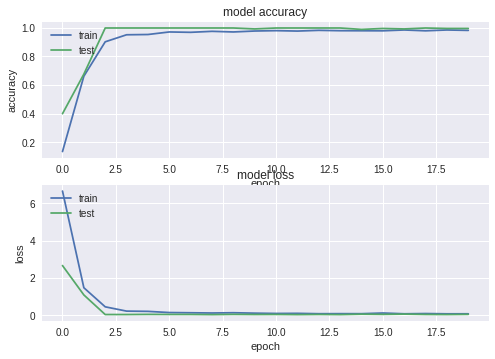

In [0]:
with open(path+'data/bottleneck_features_train.npy', 'rb') as features_train_file:
  train_data = np.load(features_train_file)
with open(path+"data/train_data.txt", "rb") as fp:
  train_labels = pickle.load(fp)

with open(path+'data/bottleneck_features_validation.npy', 'rb') as features_validation_file:
  validation_data = np.load(features_validation_file)
with open(path+"data/validation_data.txt", "rb") as fp:
  validation_labels = pickle.load(fp)


    
model2 = Sequential()
model2.add(Flatten(input_shape=[7, 7, 512]))
model2.add(Dense(activation="relu", units=512))
#130, 512
model2.add(Dropout(0.5))
#Con y sin dropout
model2.add(Dense(activation='softmax', units=153))
#sigmoid, softmax
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
#adam, rmsprop
#funcion loss
    
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

train_int_encoded = label_encoder.fit_transform(train_labels)
train_int_encoded = train_int_encoded.reshape(len(train_int_encoded), 1)
train_onehot_encoded_labels = to_categorical(train_int_encoded)

validation_int_encoded = label_encoder.fit_transform(validation_labels)
validation_int_encoded = validation_int_encoded.reshape(len(validation_int_encoded), 1)
validation_onehot_encoded_labels = to_categorical(validation_int_encoded)
    
history = model2.fit(train_data, train_onehot_encoded_labels,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=(validation_data, validation_onehot_encoded_labels))
model2.save_weights(top_model_weights_path)

plt.figure(1)  
   
#accuracy 
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
#loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  


np.save(path+'data/classes.npy', label_encoder.classes_)
#np.save(path+'data/categories.npy', onehot_encoder.categories_)
